# Capstone project- Chinese restaurant in Downtown Toronto

## Table of Contents
### 1.Introduction:Bussiness Problem 
### 2.Data
### 3.Methodology
### 4.Analysis
### 5. Result and Disscussion 
### 6. Conclusion

## Introduction: Business Problem

In this project, I try to analysis Chinese Restaurant in Downtown Toronto. Since most people use apps like yelp to search for restaurant, the rating for those spots are crucial. Price is one of the most important factors to consider when people are choosing restaurant. In this project, I will analysis the relationship between prices and ratings. 

## Data
The database I will use are exclusively from foursqaure. The following data will be ultilized: \
1, Chinese reasteraunt in Downtown Toronto\
2, ratings of each restaurant\
3, prices of each each restaurant\

At the begining, I will try to find the geographiic relationship for each restautant and then cluster them using machine learning model. Then I will compare price of each restaurant in each cluster, trying to build a regress model. 

At the begining, let's import libraries needed for this project. Also, prepapre Foursquare ID for loading data from its databases. We will get the geographic location of Downtown Toronto. A search content will also be created. 

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 6.8 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=e8e438e9605afd164b1181442e8cbc6d1f33416c570452019a16a1287dfb658a
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


In [3]:
CLIENT_ID = 'WK0QSB3S3K1RJELPKCJI0BORNMDDJNFHA4HWAW0YQY0KX0NC' # your Foursquare ID
CLIENT_SECRET = 'HIR04WN5D1FZS5WOI5OFTQKYYZ3VZYSJNKOMFS15ZNYZYUWA' # your Foursquare Secret
ACCESS_TOKEN = 'DQK3VHXA41CZN1HJSEO2EXALLOENOE3Q5RGLGPLTFS4QU2MW' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: WK0QSB3S3K1RJELPKCJI0BORNMDDJNFHA4HWAW0YQY0KX0NC
CLIENT_SECRET:HIR04WN5D1FZS5WOI5OFTQKYYZ3VZYSJNKOMFS15ZNYZYUWA


In [4]:
address = 'Downtown Toronto'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6541737 -79.38081164513409


In [5]:
search_query = 'Chinese Restaurant'
radius = 500
print(search_query + ' .... OK!')

Chinese Restaurant .... OK!


We will get an Url from Foursquare database and use it to retrieve a list of venue.

In [34]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=WK0QSB3S3K1RJELPKCJI0BORNMDDJNFHA4HWAW0YQY0KX0NC&client_secret=HIR04WN5D1FZS5WOI5OFTQKYYZ3VZYSJNKOMFS15ZNYZYUWA&ll=43.6541737,-79.38081164513409&oauth_token=DQK3VHXA41CZN1HJSEO2EXALLOENOE3Q5RGLGPLTFS4QU2MW&v=20180604&query=Chinese Restaurant&radius=500&limit=30'

In [35]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6005df6be53c096fdfa8bdbd'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4b2027b5f964a520f82d24e3',
    'name': 'Hong Shing Chinese Restaurant',
    'location': {'address': '195 Dundas St W',
     'crossStreet': 'at University Ave',
     'lat': 43.65492521335936,
     'lng': -79.38708916106386,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65492521335936,
       'lng': -79.38708916106386}],
     'distance': 512,
     'postalCode': 'M5G 1C7',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['195 Dundas St W (at University Ave)',
      'Toronto ON M5G 1C7',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asia

We will create a data frame for our results. we will filter unrelated information, and keep those related. I will write a function that Keep the ID and category of each item, and related information will also be kept. 

In [8]:
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4b2027b5f964a520f82d24e3,Hong Shing Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1610995314,False,195 Dundas St W,at University Ave,43.654925,-79.387089,"[{'label': 'display', 'lat': 43.65492521335936...",512,M5G 1C7,CA,Toronto,ON,Canada,"[195 Dundas St W (at University Ave), Toronto ...",60327598,NaN
1,52a7ae41498eed3af4d0a3fa,Yueh Tung Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1610995314,False,126 Elizabeth St.,Dundas St.,43.655281,-79.385337,"[{'label': 'display', 'lat': 43.65528126342919...",384,M5G 1P5,CA,Toronto,ON,Canada,"[126 Elizabeth St. (Dundas St.), Toronto ON M5...",NaN,NaN
2,4adf80b9f964a5202f7b21e3,Good View Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1610995314,False,132 Dundas Street East,NaN,43.656791,-79.376139,"[{'label': 'display', 'lat': 43.65679124992238...",475,NaN,CA,Toronto,ON,Canada,"[132 Dundas Street East, Toronto ON, Canada]",NaN,NaN
3,4f04779a02d5cce0cfc06151,Chinese Visa Application Service Center,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",v-1610995314,False,"393 University Ave, Suite 1501",in University Centre,43.654028,-79.387365,"[{'label': 'display', 'lat': 43.65402839343005...",528,NaN,CA,Toronto,ON,Canada,"[393 University Ave, Suite 1501 (in University...",NaN,NaN
4,53ae6660498e1ac3c1282743,Castries Bar & Five Way Restaurant,"[{'id': '4bf58dd8d48988d144941735', 'name': 'C...",v-1610995314,False,NaN,NaN,43.654728,-79.380928,"[{'label': 'display', 'lat': 43.65472793579101...",62,NaN,CA,NaN,NaN,Canada,[Canada],NaN,NaN


In [9]:
dataframe.shape

(30, 19)

In [10]:
filtered_columns = ['id','name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,id,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,4b2027b5f964a520f82d24e3,Hong Shing Chinese Restaurant,Chinese Restaurant,195 Dundas St W,at University Ave,43.654925,-79.387089,"[{'label': 'display', 'lat': 43.65492521335936...",512,M5G 1C7,CA,Toronto,ON,Canada,"[195 Dundas St W (at University Ave), Toronto ...",NaN,4b2027b5f964a520f82d24e3
1,52a7ae41498eed3af4d0a3fa,Yueh Tung Chinese Restaurant,Chinese Restaurant,126 Elizabeth St.,Dundas St.,43.655281,-79.385337,"[{'label': 'display', 'lat': 43.65528126342919...",384,M5G 1P5,CA,Toronto,ON,Canada,"[126 Elizabeth St. (Dundas St.), Toronto ON M5...",NaN,52a7ae41498eed3af4d0a3fa
2,4adf80b9f964a5202f7b21e3,Good View Chinese Restaurant,Chinese Restaurant,132 Dundas Street East,NaN,43.656791,-79.376139,"[{'label': 'display', 'lat': 43.65679124992238...",475,NaN,CA,Toronto,ON,Canada,"[132 Dundas Street East, Toronto ON, Canada]",NaN,4adf80b9f964a5202f7b21e3
3,4f04779a02d5cce0cfc06151,Chinese Visa Application Service Center,Government Building,"393 University Ave, Suite 1501",in University Centre,43.654028,-79.387365,"[{'label': 'display', 'lat': 43.65402839343005...",528,NaN,CA,Toronto,ON,Canada,"[393 University Ave, Suite 1501 (in University...",NaN,4f04779a02d5cce0cfc06151
4,53ae6660498e1ac3c1282743,Castries Bar & Five Way Restaurant,Caribbean Restaurant,NaN,NaN,43.654728,-79.380928,"[{'label': 'display', 'lat': 43.65472793579101...",62,NaN,CA,NaN,NaN,Canada,[Canada],NaN,53ae6660498e1ac3c1282743


Now, we filter the information again. category is Chinese Restaurant. 

In [11]:
df = dataframe_filtered[dataframe_filtered.categories == 'Chinese Restaurant']
df.name

0     Hong Shing Chinese Restaurant
1      Yueh Tung Chinese Restaurant
2      Good View Chinese Restaurant
18       Wah Too Seafood Restaurant
29                     Lai Wah Heen
Name: name, dtype: object

Now, let's create a map to visualized those restaurants. it also give us a idea how much clusters may be needed. 

In [12]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df.lat, df.lng, df.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Methology
In this section, we will start data analysis.\
1, We will firstly substarct the longitude and latitude for each Chinese Restaurant. \
2, Then, cluster them according to their geographic location. \
3, Get information about their prices
4, build a regression model for the relationships of ratings and price\

the techniques used include clustering and clustering 

let's begin with substract the geograohic locations and put them in a dataframe

In [13]:
df2 = df[['lat','lng']]
df2.head()

,lat,lng
0,43.654925,-79.387089
1,43.655281,-79.385337
2,43.656791,-79.376139
18,43.654833,-79.387206
29,43.655038,-79.385890


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

change dataframe into array and prepare for clustering. the number of cluster is set to be 2 according to the map we created earlier. 

In [17]:
X = np.nan_to_num(df2)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-0.61901943, -0.66312514],
       [-0.12757105, -0.24155993],
       [ 1.95663136,  1.97069953],
       [-0.74650338, -0.69122193],
       [-0.46353749, -0.37479253]])

In [18]:
k_means = KMeans(init="k-means++", n_clusters=2, n_init=12)
k_means.fit(X)

KMeans(n_clusters=2, n_init=12)

In [19]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 1, 0, 0], dtype=int32)

In [20]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 43.6550193 , -79.38638052],
       [ 43.65679125, -79.37613918]])

Now, visualize the cluster 

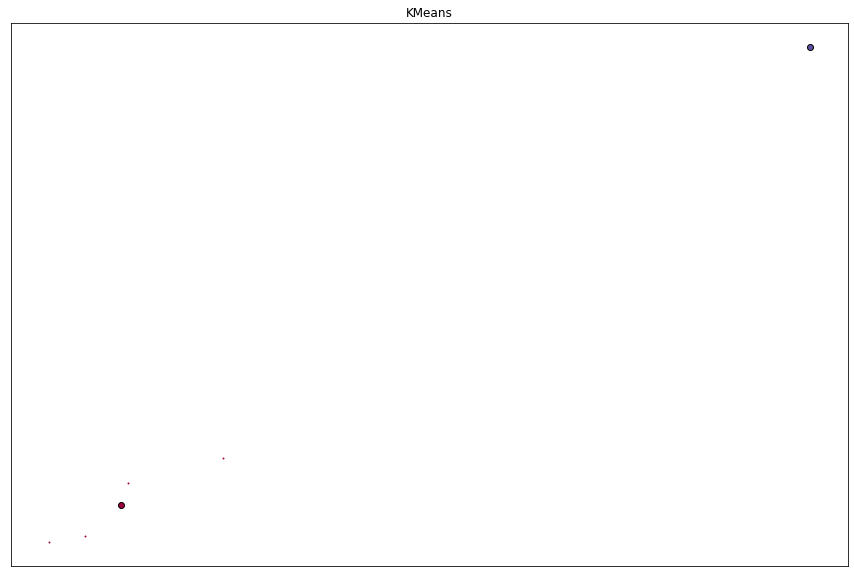

In [21]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

IDs were substracted to retrieve information from foursquare databases

In [41]:
df.id

,id,id
0,4b2027b5f964a520f82d24e3,4b2027b5f964a520f82d24e3
1,52a7ae41498eed3af4d0a3fa,52a7ae41498eed3af4d0a3fa
2,4adf80b9f964a5202f7b21e3,4adf80b9f964a5202f7b21e3
18,4c69740b8d22c9284d42b745,4c69740b8d22c9284d42b745
29,4ad4c060f964a5205cf720e3,4ad4c060f964a5205cf720e3


The first ID served as an example of how to take useful information. \
1, get an url from Foursquare \
2, get the keys for venues\
3, target the price keys and keep "tier" for later analysis\
4, the ratings will also be retrieved

In [42]:
venue_id = ['4b2027b5f964a520f82d24e3']
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
url

"https://api.foursquare.com/v2/venues/['4b2027b5f964a520f82d24e3']?client_id=WK0QSB3S3K1RJELPKCJI0BORNMDDJNFHA4HWAW0YQY0KX0NC&client_secret=HIR04WN5D1FZS5WOI5OFTQKYYZ3VZYSJNKOMFS15ZNYZYUWA&oauth_token=DQK3VHXA41CZN1HJSEO2EXALLOENOE3Q5RGLGPLTFS4QU2MW&v=20180604"

In [52]:
result = requests.get(url).json()
result
print(result['response']['venue'].keys())


dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'like', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


In [53]:
result['response']['venue']

{'id': '4c69740b8d22c9284d42b745',
 'name': 'Wah Too Seafood Restaurant',
 'contact': {},
 'location': {'address': '56 Centre Ave.',
  'lat': 43.65483285234745,
  'lng': -79.38720597193928,
  'labeledLatLngs': [{'label': 'display',
    'lat': 43.65483285234745,
    'lng': -79.38720597193928}],
  'postalCode': 'M5G 1R5',
  'cc': 'CA',
  'city': 'Toronto',
  'state': 'ON',
  'country': 'Canada',
  'formattedAddress': ['56 Centre Ave.', 'Toronto ON M5G 1R5', 'Canada']},
 'canonicalUrl': 'https://foursquare.com/v/wah-too-seafood-restaurant/4c69740b8d22c9284d42b745',
 'categories': [{'id': '4bf58dd8d48988d145941735',
   'name': 'Chinese Restaurant',
   'pluralName': 'Chinese Restaurants',
   'shortName': 'Chinese',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 11},
 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'},
 'likes': {'count': 4,
  'groups': [{'type': 'other

In [211]:
price = result['response']['venue']['price']
print(result['response']['venue']['price'].keys())

dict_keys(['tier', 'message', 'currency'])


In [213]:
price

{'tier': 2, 'message': 'Moderate', 'currency': '$'}

Now repeat the same process again for all restaurant, and also get their corresponding ratings. 

In [47]:
venue_id1 = '4b2027b5f964a520f82d24e3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id1, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
result = requests.get(url).json()
price1 = result['response']['venue']['price']['tier']
print(price1)

rating1 = result['response']['venue']['rating']
try:
    print(rating1)
except:
    print('This venue has not been rated yet.')


2
7.1


In [48]:
venue_id2 = '4adf80b9f964a5202f7b21e3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id2, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
result = requests.get(url).json()
price2 = result['response']['venue']['price']['tier']
print(price2)

rating2 = result['response']['venue']['rating']
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

1
6.2


In [49]:
venue_id3 = '4ad4c060f964a5205cf720e3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id3, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
result = requests.get(url).json()
price3 = result['response']['venue']['price']['tier']
print(price3) 

rating3 = result['response']['venue']['rating']
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')


3
6.6


In [50]:
venue_id4 = '52a7ae41498eed3af4d0a3fa' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id4, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

result = requests.get(url).json()

price4 = result['response']['venue']['price']['tier']
print(price4) 

rating4 = result['response']['venue']['rating']

try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

1
7.4


In [51]:
venue_id5 = '4c69740b8d22c9284d42b745' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id5, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

result = requests.get(url).json()

price5 = result['response']['venue']['price']['tier']
print(price5) 

rating5 = result['response']['venue']['rating']

try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

1
6.1


A new data frame is built to collect information 

In [54]:
df = pd.DataFrame(np.array([[venue_id1, price1, rating1], [venue_id2, price2, rating2], [venue_id3, price3, rating3], [venue_id4, price4, rating4], [venue_id5, price5, rating5]]), 
                  columns= ['ID','Price tier','Rating'])
df

,ID,Price tier,Rating
0,4b2027b5f964a520f82d24e3,2,7.1
1,4adf80b9f964a5202f7b21e3,1,6.2
2,4ad4c060f964a5205cf720e3,3,6.6
3,52a7ae41498eed3af4d0a3fa,1,7.4
4,4c69740b8d22c9284d42b745,1,6.1


In [55]:
df.dtypes

ID            object
Price tier    object
Rating        object
dtype: object

Data type change to float for relationship analysis

In [56]:
df['Price tier'] = df['Price tier'].astype(float)
df['Rating'] = df['Rating'].astype(float)

A new dataframe is created for analysis

In [94]:
df2 = df[['Price tier', 'Rating']]
df2

,Price tier,Rating
0,2.0,7.1
1,1.0,6.2
2,3.0,6.6
3,1.0,7.4
4,1.0,6.1


visualize the plot

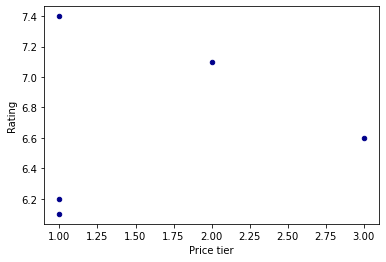

In [62]:
scatterplot = df2.plot.scatter(x='Price tier',
                      y='Rating',
                      c='DarkBlue')

Prepare data for building regression model. Change the dataframe to array

In [102]:
from sklearn.linear_model import LinearRegression


In [92]:
x2 = df['Price tier'].values
y2 = df['Rating'].values

y2

array([7.1, 6.2, 6.6, 7.4, 6.1])

quadratic regression seems the best regression model. 

In [95]:
def quadratic(x, Beta_1, Beta_2):
     y = Beta_1*x**Beta_2
     return y

Normalize the data and find the best parameters. 

In [96]:
x3 =x2/max(x2)
y3 =y2/max(y2)

In [97]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(quadratic, x3, y3)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 0.921925, beta_2 = 0.028577


Visulize the model

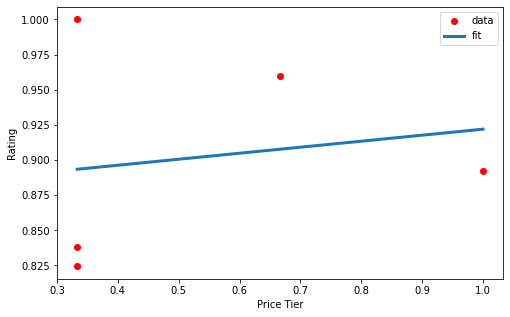

In [101]:
x = np.linspace(1, 3, 2)
x = x/max(x)
plt.figure(figsize=(8,5))
y = quadratic(x, *popt)
plt.plot(x3, y3, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Rating')
plt.xlabel('Price Tier')
plt.show()

## Result and Discussion 
The final model is y=0.92x^0.028, which is also a non-linear relationship between price and ratings for Chinese restaurant in Downrown Toronoto. According to the graph, it does not seems like a 